In [36]:
# Raw Data generation 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples in the dataset
num_samples = 1000

# Generate random features for the dataset
feature1 = np.random.normal(loc=0, scale=1, size=num_samples)
feature2 = np.random.uniform(low=0, high=1, size=num_samples)

# Generate random durations (time to event)
# For demonstration purposes, let's assume durations follow a Weibull distribution
shape = 2  # Shape parameter for the Weibull distribution
scale = 10  # Scale parameter for the Weibull distribution
durations = np.random.weibull(shape, size=num_samples) * scale

# Generate binary event indicators (1 if event occurred, 0 otherwise)
# Let's assume events occur if feature1 is positive and feature2 is greater than 0.5
events = (feature1 > 0) & (feature2 > 0.5)

In [37]:
events

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False,  True,  True,  True, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [38]:
# Create a DataFrame with the generated data
data = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'duration': durations,
    'event': events
})

# Save the synthetic dataset to a CSV file
data.to_csv('synthetic_survival_data.csv', index=False)

# Print a sample of the generated dataset
print(data.head())

   feature1  feature2   duration  event
0  1.764052  0.821904  19.905358   True
1  0.400157  0.700529   5.311902   True
2  0.978738  0.883078  11.133815   True
3  2.240893  0.966575   8.387054   True
4  1.867558  0.774748   8.071982   True


In [42]:
# Import necessary libraries
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines import WeibullAFTFitter
from sklearn.model_selection import train_test_split

In [43]:
data.head()

,feature1,feature2,duration,event
0,1.764052,0.821904,19.905358,True
1,0.400157,0.700529,5.311902,True
2,0.978738,0.883078,11.133815,True
3,2.240893,0.966575,8.387054,True
4,1.867558,0.774748,8.071982,True


<AxesSubplot:>

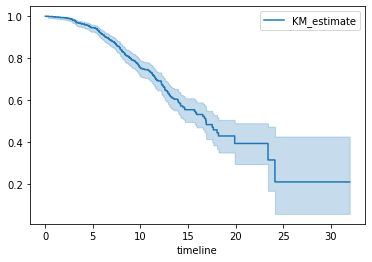

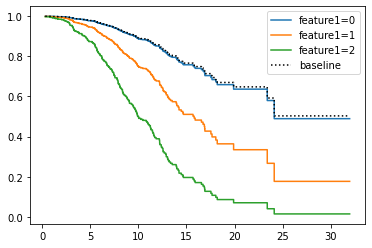

In [45]:
# Load your dataset (assuming you have a CSV file named 'survival_data.csv')
data = pd.read_csv('synthetic_survival_data.csv')

# Data Preprocessing: Assume 'duration' is time until event and 'event' is 1 if event occurred, 0 otherwise
# For demonstration purposes, let's assume you have features 'feature1', 'feature2', etc.
X = data[['feature1', 'feature2']]
y = data[['duration', 'event']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kaplan-Meier Estimator for Survival Curve
kmf = KaplanMeierFitter()
kmf.fit(y_train['duration'], event_observed=y_train['event'])
kmf.plot_survival_function()
# Optionally, you can also plot survival curves for different groups using kmf.plot()

# Cox Proportional Hazard Model
cph = CoxPHFitter()
cph.fit(pd.concat([X_train, y_train], axis=1), duration_col='duration', event_col='event')
cph.plot_partial_effects_on_outcome(covariates='feature1', values=[0, 1, 2])  # Example partial effects plot

<AxesSubplot:>

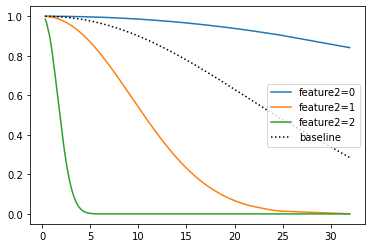

In [46]:
# Weibull Accelerated Failure Time (AFT) Model
wft = WeibullAFTFitter()
wft.fit(pd.concat([X_train, y_train], axis=1), duration_col='duration', event_col='event')
wft.plot_partial_effects_on_outcome(covariates='feature2', values=[0, 1, 2])  # Example partial effects plot

# Evaluate models on the test set
# For example, you can use cph.predict_expectation(X_test) to get survival time predictions from the Cox model

# Note: This is a simplified example. You might need to handle missing data, perform feature engineering,
#       and fine-tune models based on your specific dataset and requirements.
